In [1]:
import matplotlib.pyplot as plt
from PIL import Image
from highlight_text import fig_text

from mplsoccer import PyPizza, add_image, FontManager


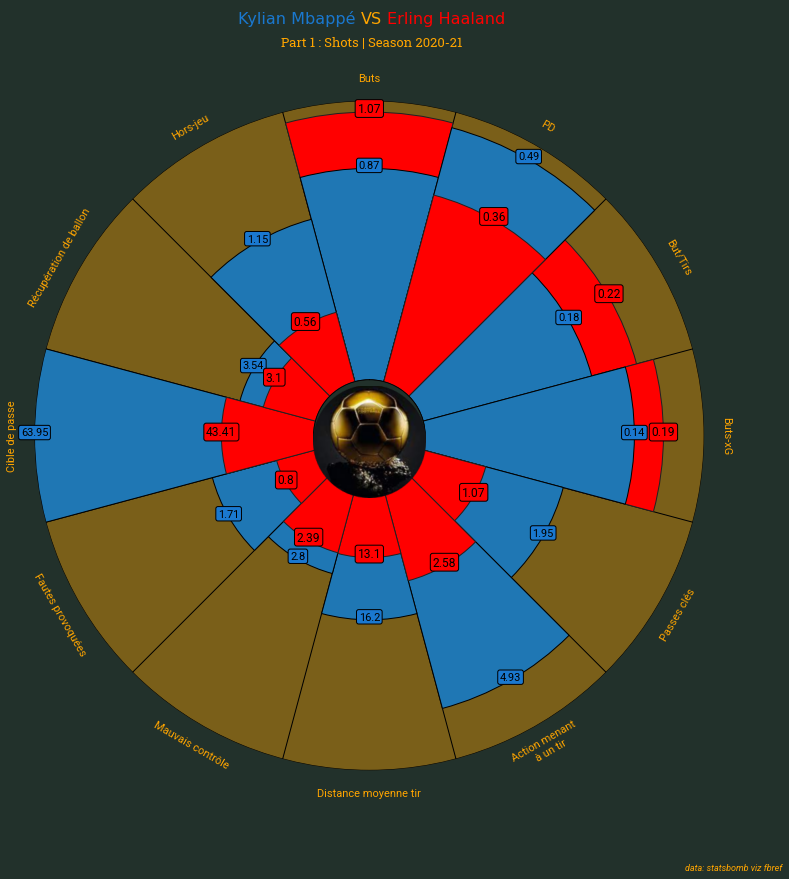

In [2]:
font_normal = FontManager(("https://github.com/google/fonts/blob/main/apache/roboto/"
                           "Roboto%5Bwdth,wght%5D.ttf?raw=true"))
font_italic = FontManager(("https://github.com/google/fonts/blob/main/apache/roboto/"
                           "Roboto-Italic%5Bwdth,wght%5D.ttf?raw=true"))
font_bold = FontManager(("https://github.com/google/fonts/blob/main/apache/robotoslab/"
       
                         "RobotoSlab%5Bwght%5D.ttf?raw=true"))
# Les images de Mbappé et Haaland sont rajoutées à la fin avec photofiltre
# Importation de l'image du centre de la pizza
BallonOr = Image.open("D:/Images/ballon_or_1.png")





# Liste des paramètres
params = ["Buts", "PD", "But/Tirs", "Buts-xG", "Passes clés", "Action menant \nà un tir",
          "Distance moyenne tir", "Mauvais contrôle", "Fautes provoquées",
          "Cible de passe", "Récupération de ballon", "Hors-jeu"]
Mbappe_values = [0.87, 0.49, 0.18, 0.14, 1.95, 4.93, 16.2, 2.8, 1.71, 63.95, 3.54, 1.15]
Haaland_values = [1.07, 0.36, 0.22, 0.19, 1.07, 2.58, 13.1, 2.39, 0.8, 43.41, 3.1, 0.56]
max_values = [1.11, 0.52, 0.27, 0.26, 3.42, 5.86, 23.7, 6.46, 4.07, 63.95, 7.19, 1.83]
min_values = [0.12, 0, 0.03, -0.22, 0.36, 0.9, 9.8, 1.14, 0.25, 33.28, 2.12, 0.12]
# Couleur pour les parts (de pizza)


# Couleur du texte
text_colors = ["black"] * 12  # valeurs (dans les encadrés) : noir pour toutes les tranches

baker = PyPizza(
    params=params,                  # list of parameters
    background_color="#22312b",     # background color
    min_range=min_values,  # min range values
    max_range=max_values,  # max range values
    straight_line_color="#000000",  # color for straight lines
    straight_line_lw=1,             # linewidth for straight lines
    last_circle_color="#000000",    # color for last line
    last_circle_lw=1,               # linewidth of last circle
    other_circle_lw=0,              # linewidth for other circles
    inner_circle_size=20            # size of inner circle
)
# plot pizza
fig, ax = baker.make_pizza(
    Mbappe_values,                          # list of values
    compare_values= Haaland_values,   # Comparer les valeurs
    figsize=(12, 12.5),                # adjust the figsize according to your need

    # couleur fond des parts : on peut mettre same, sinon on attribue pour chaque part
    color_blank_space=["orange", "orange", "orange", "orange", "orange", "orange", "orange", "orange", "orange", "orange", "orange", "orange"],
    #slice_colors=slice_colors,       # color for individual slices
    value_colors=text_colors,        # color for the value-text
   #value_bck_colors=slice_colors,   # color for the blank spaces
    blank_alpha=0.4,                 # alpha for blank-space colors

    kwargs_slices=dict(
    edgecolor="black", zorder=2, linewidth=1),   # edgecolor = couleur du bord des parts


    # Paramètres au-dessus des parts
    kwargs_params=dict(
        color="orange", fontsize=11,
        fontproperties=font_normal.prop, va="center"
    ),  # values to be used when adding parameter labels


     # Valeurs encadrées pour Mbappé
    kwargs_values=dict(
        color="black", fontsize=11,
        fontproperties=font_normal.prop, zorder=3,
        bbox=dict(
            edgecolor="#000000", facecolor="#1a78cf",
            boxstyle="round,pad=0.2", lw=1
        )
    ),  # values to be used when adding parameter-values labels


    # Couleur des parts de Haaland
    kwargs_compare=dict(
        facecolor="#FF0000", edgecolor="#222222",
        zorder=2, linewidth=1,
    ),
    # valeurs encadrées sur les parts pour Haaland
    kwargs_compare_values=dict(
        color="#000000", fontsize=12, fontproperties=font_normal.prop, zorder=3,
        bbox=dict(edgecolor="#000000", facecolor="#FF0000", boxstyle="round,pad=0.2", lw=1)

    ),

)
fig.text(
    0.515, 0.935,
    "Part 1 : Shots | Season 2020-21",
    size=13,
    ha="center", fontproperties=font_bold.prop, color="orange"
)

# add credits
CREDIT_1 = "data: statsbomb viz fbref"

fig.text(
    0.99, 0.02, f"{CREDIT_1}", size=9,
    fontproperties=font_italic.prop, color="orange",
    ha="right"
)


# add title
fig_text(
    0.515, 0.975, "<Kylian Mbappé> <VS> <Erling Haaland>", size=16,
    ha="center", highlight_textprops=[{"color": '#1a78cf'}, {"color": 'orange'}, {"color": '#FF0000'}]
)
# add image
ax_image = add_image(
    BallonOr, fig, left=0.4478, bottom=0.4315, width=0.13, height=0.127
)   # these values might differ when you are plotting